### Final Project: Analysis of Boston House Prices
Analysing the relationship between the variables from boston house prices dataset by evaluating hypotheses with statistical tests and regression.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
## Importing the dataset for notebook

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Description of the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-      NOX - nitric oxides concentration (parts per 10 million)
-      RM - average number of rooms per dwelling
-      AGE - proportion of owner-occupied units built prior to 1940
-      DIS - weighted distances to five Boston employment centres
-      RAD - index of accessibility to radial highways
-      TAX - full-value property-tax rate per 10,000 dollars
-      PTRATIO - pupil-teacher ratio by town
-      LSTAT - % lower status of the population
-      MEDV - Median value of owner-occupied homes in 1000's dollars

In [3]:
# cleaning the data set
boston_df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0, 0.5, 'Median number of owner-occupied homes')

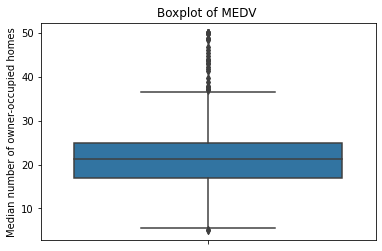

In [4]:
# Creating a plot of MEDV - "Median value of owner-occupied homes" with a boxplot

sns.boxplot(y = 'MEDV', data = boston_df)
plt.title('Boxplot of MEDV ')
plt.ylabel('Median number of owner-occupied homes')

### Explaination of the Plot above:
1. the median of MEDV is around 21
2. There are a lot of outliers above the maximum MEDV value as per the boxplot. Maybe the IQR is not right to deal with such spread of values

Text(0.5, 0, 'Value of CHAS - dummy variable')

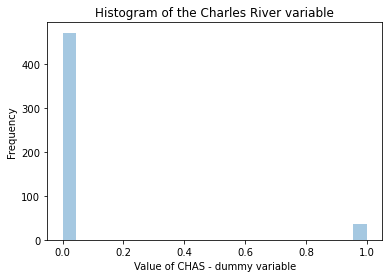

In [5]:
# Creating a histogram for the Charles river variable - CHAS
sns.distplot( boston_df['CHAS'], kde = False)
plt.title('Histogram of the Charles River variable')
plt.ylabel('Frequency')
plt.xlabel('Value of CHAS - dummy variable')



### Explaination of the Plot above:
1. there are only 2 values for CHAS variable, thus the histogram has only two visible bars
2. Most of the houses do not have Charles River present, only about one-fifth have the river present

Text(0.5, 0, 'Age-group')

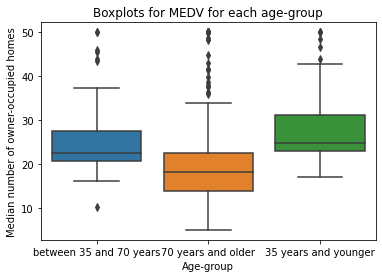

In [6]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# discretisation and binning
boston_df.loc[boston_df['AGE'] <= 35, 'age-group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70) , 'age-group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'age-group'] = '70 years and older'

sns.boxplot(x = 'age-group', y = 'MEDV', data = boston_df)
plt.title('Boxplots for MEDV for each age-group')
plt.ylabel('Median number of owner-occupied homes')
plt.xlabel('Age-group')



### Explaination of the Plot above:
1. The MEDV is the lowest for the houses 70 years and older.
2. MEDV seems to be decreasing with increasing AGE value.
3. Most outliers of MEDV are present the old houses 70 years and older

Text(0.5, 0, 'Non-retail business acres/town')

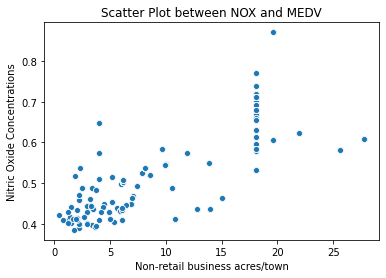

In [7]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations - NOX and the proportion of 
# non-retail business acres per town - INDUS. What can you say about the relationship?
sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df) 

plt.title('Scatter Plot between NOX and MEDV')
plt.ylabel('Nitric Oxide Concentrations')
plt.xlabel('Non-retail business acres/town')



### Explaination of the Plot above:
1. There seems to be a positive correlation between the two variables. 
2. More observations are present at lower INDUS values.

Text(0.5, 0, 'Ratio of Pupil to Teacher by town')

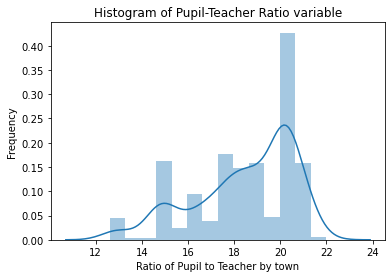

In [8]:
# Create a histogram for the pupil to teacher ratio variable - PTRATIO
sns.distplot( boston_df['PTRATIO'], kde = True)
plt.title('Histogram of Pupil-Teacher Ratio variable')
plt.ylabel('Frequency')
plt.xlabel('Ratio of Pupil to Teacher by town')


### Explaination of the Plot above:
1. Most towns have pupil-teacher ratio between 17 and 21, with a peak near 20
2. The distribution is asymmetric around the mode-value

In [9]:
# Question 1 : Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples) 2 variables are MEDV, CHAS

# categorise MEDV with presence of charles river or not
river_medians = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_medians = boston_df[boston_df['CHAS'] == 0]['MEDV']

# check for equality of variances - Levene's test
plevene = scipy.stats.levene(river_medians, non_river_medians, center = 'mean')[1]

if plevene >0.05:
    print('Variances can be assumed equal')
    pval = scipy.stats.ttest_ind(river_medians, non_river_medians, equal_var = True)[1]
else:
    print('variances can not be assumed to be equal')
    pval = scipy.stats.ttest_ind(river_medians, non_river_medians, equal_var = False)[1]
    
# T-test hypothesis
# Null hypothesis H0 = There is no statistical difference between the median number of houses with the presence or absence of river
# Alternate hypothesis Ha = There is a statistically significant difference between the median number of houses with the presence or absence of river

alpha = 0.05 # significance level
    
# T test output/explaination

if pval < alpha: # can reject null hypothesis
    print('Null hypothesis can be rejected. Presence of river does make a difference on the median number of houses.')
else:
    print('Null hypothesis cannot be rejected. There is insufficient evidence of impact of presence of river on the median number of houses.')


variances can not be assumed to be equal
Null hypothesis can be rejected. Presence of river does make a difference on the median number of houses.


In [10]:
# Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# we will use the age-groups to categorize MEDV into three variables
less_than_35 =  boston_df[boston_df['age-group'] == '35 years and younger']['MEDV']
between_35and70 =  boston_df[boston_df['age-group'] == 'between 35 and 70 years']['MEDV']
more_than_70 =  boston_df[boston_df['age-group'] == '70 years and older']['MEDV']

# Hypotheses for ANOVA test
# H0, null hypothesis = AGE doesnt make a difference on the median values of houses(MEDV)
# Ha, alternate hypothesis = AGE does make a difference on the median values of houses(MEDV)

fstat,pval = scipy.stats.f_oneway(less_than_35, between_35and70, more_than_70)

alpha = 0.05 # significance level
    
# T test output/explaination

if pval < alpha: # can reject null hypothesis
    print('Null hypothesis can be rejected. \nThere is statistically significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')
else:
    print('Null hypothesis cannot be rejected. \nThere is no evident difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')


Null hypothesis can be rejected. 
There is statistically significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)


In [11]:
# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# from the scatterplot, there looks like there is positive correlation between the concentrations and proportion of non-retail business acres per town
# lets verify using pearson correlation values
coeff, pval = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Hypothesis for correlation
# H0, null hypothesis = there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# Ha, alternate hypothesis = there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

alpha = 0.05 # significance level
    
# T test output/explaination

if pval < alpha: # can reject null hypothesis
    print('Null hypothesis can be rejected. \nThere is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town \nCoefficient of correlation = {}'.format(coeff))
else:
    print('Null hypothesis cannot be rejected. \nYes, there is no evident relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')


Null hypothesis can be rejected. 
There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town 
Coefficient of correlation = 0.7636514469209154


In [12]:
# Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# MEDV - continuous dependent variable, DIS - continuous explanatory variable
y = boston_df['MEDV']
X = boston_df['DIS']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#Hypothesis
# H0, null hypothesis = there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# Ha, alternate hypothesis = there is a correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes


model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        08:09:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion from summary
Since p-value is 1.21e-08, much lower than the significance level of 0.05,

There is a moderate correlation, with the coefficient of correlation =  0.25